# Donorschoose.org Donor-School States: Network Analysis
A Data Exploration of the Donorschoose.org Dataset

### Initialization and Data Loading

In [ ]:
import pandas as pd
import plotly.plotly as py
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

from itertools import chain
from collections import OrderedDict
from collections import OrderedDict

To save resources, the dataset used for this section is the resulting project-donations cluster labeled sampled dataset.

In [110]:
df_combined = pd.read_csv('donors-choose-labeled-project-donations-cluster.csv')
df_combined = df_combined[['Donor State','School State']]

### Creating a Directional Graph
In order to trace where donors from specific states donate their money to, a directional network graph is created.

In [210]:
G = nx.DiGraph()

### Adding donor-school edges
Edges connecting donor states and school states are added from the `Donor State` and `School State` columns. Nodes are automatically created.

In [211]:
labels = {}

for i in range(len(df_combined)):
    G.add_edge(df_combined.iloc[i,0],df_combined.iloc[i,1])
    labels[df_combined.iloc[i,0]] = df_combined.iloc[i,0]

### Defining colors for the nodes

In [274]:

in_deg = [i for i in chain(G.in_degree())]

val_in = {}
for i in range(len(in_deg)):
    val_in[in_deg[i][0]]=in_deg[i][1]
    
factor_size = 70
    
values_in = [val_in.get(node, 0.25)*factor_size for node in G.nodes()]

color_map_in = plt.get_cmap('RdPu')

### Plotting the Network Graphs: Interstate Donations

#### In-degree analysis: Analyzing which states get the most donations

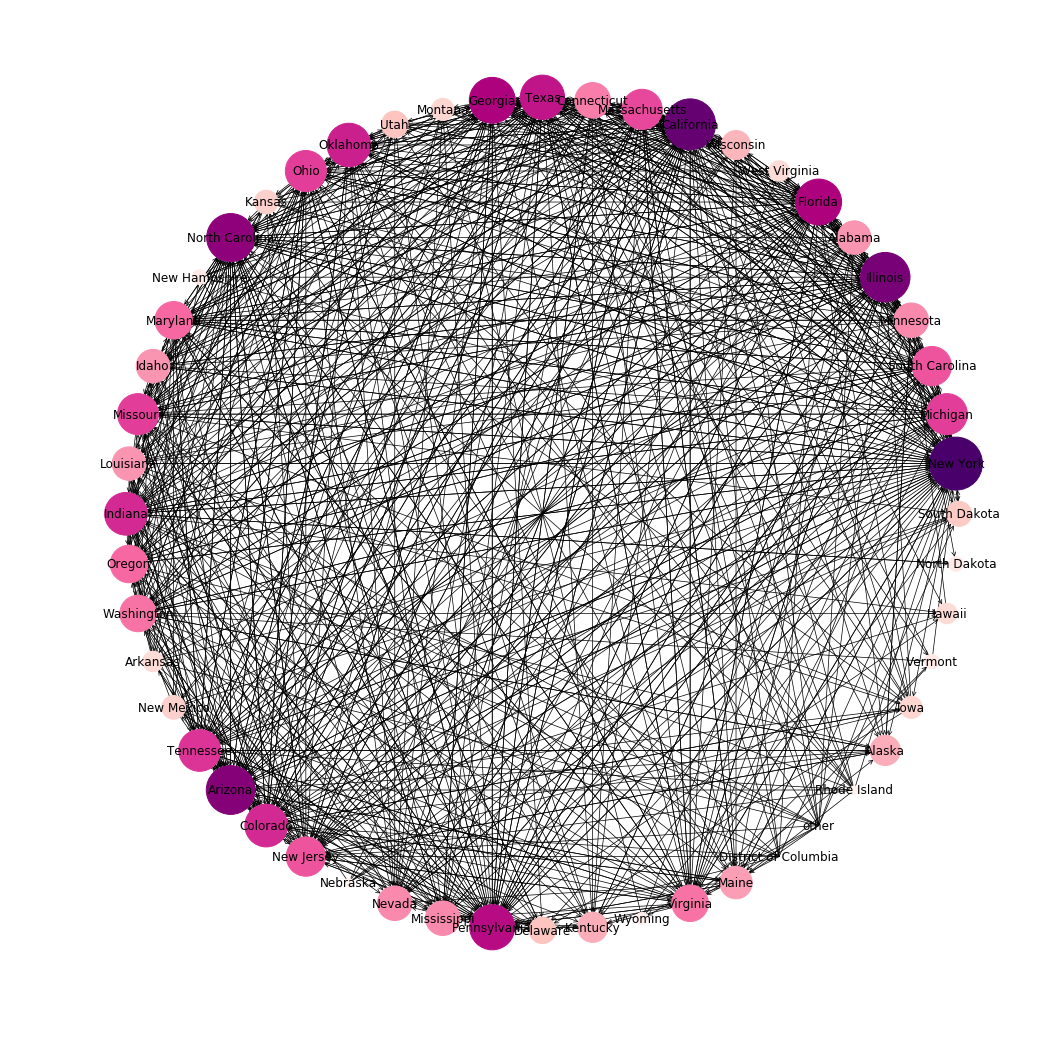

In [307]:
plt.figure(figsize = (14,14))
nx.draw(G, pos = nx.circular_layout(G), node_size = values_in, labels = labels,arrowstyle='->',
        cmap=color_map_in, node_color = values_in, with_labels = True, width=0.7)
plt.show()

In [265]:
od = OrderedDict(sorted(val_in.items(), key=lambda t: t[1], reverse=True))
in_od = [i for i in chain(list(od.items())[:5])]
print('States with the highest in-degree values: {}'.format(in_od))

States with the highest in-degree values: [('New York', 40), ('California', 37), ('Illinois', 35), ('Arizona', 34), ('North Carolina', 33)]


**Observations:** Based on the influx of donations from one state to another, the states that receive the most interstate donations is New York, California, Illinois, and Arizona.

#### Out-degree analysis: Analyzing which states send the most donations

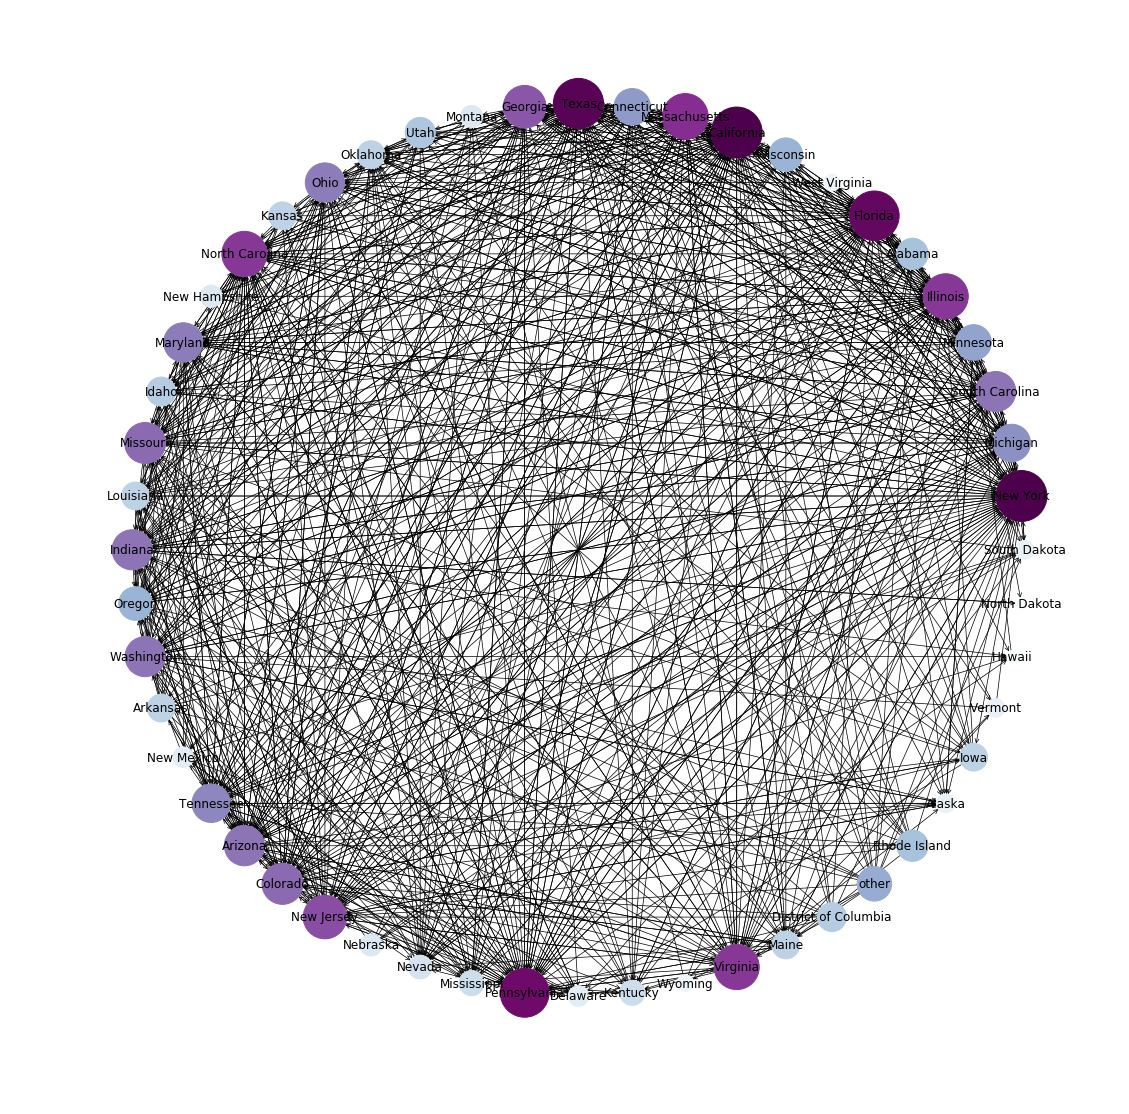

In [297]:
H = nx.DiGraph()

labels = {}

for i in range(len(df_combined)):
    H.add_edge(df_combined.iloc[i,0],df_combined.iloc[i,1])
    labels[df_combined.iloc[i,0]] = df_combined.iloc[i,0]

from itertools import chain
out_deg = [i for i in chain(H.out_degree())]

val_out = {}
for i in range(len(out_deg)):
    val_out[out_deg[i][0]]=out_deg[i][1]
    
values_out = [val_out.get(node, 0.25)*70 for node in H.nodes()]

color_map_out = plt.get_cmap('BuPu')

plt.figure(figsize = (15,15))
nx.draw(H, pos = nx.circular_layout(H), node_size = values_out, labels = labels, 
        arrowstyle='->',cmap=color_map_out, node_color = values_out, with_labels = True, width=0.7)
plt.show()

In [268]:
od = OrderedDict(sorted(val_out.items(), key=lambda t: t[1], reverse=True))
out_od = [i for i in chain(list(od.items())[:5])]
print('States with the highest out-degree values: {}'.format(out_od))

States with the highest out-degree values: [('New York', 37), ('California', 37), ('Texas', 36), ('Florida', 35), ('Pennsylvania', 34)]


**Observations:** Based on the influx of donations from one state to another, the states that send the most interstate donations are New York, California, Texas, Florida, and Pennsylvania.

### Exporting GEXF files for Gephi Visualization

In [95]:
nx.write_gexf(G, "donorschoose-in-degree.gexf")
nx.write_gexf(H, "donorschoose-out-degree.gexf")